# Salary Prediction for 'TechWorks Consulting' 

# Problem Statement
- **Context and Company Background:** TechWorks Consulting, a company specializing in IT talent recruitment, and highlights its unique approach to matching skilled IT professionals with job opportunities.
- **Data Description:** The Dataset conatins information about colleges, cities, roles, previous experience, and salary. This information will be used to train and test the predictive model.
- **Regression Task:** The primary objective is to perform a regression task, where the aim is to predict a continuous variable, specifically the salary of newly hired employees.
- **Role of Statistics:** The role of statistics is to build and check the accuracy of the model.
- **Data Preprocessing:** Data Preprocessing is most important task as it involves tasks like handling missing values, outliers, categorical variables, normalization, and feature selection.

# 1. Importing Libraries
###     Importing basic libraries for:
* Data Manipulation
* Data Visualization
* Data Analysis

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# 2. Data Collection
### Importing the data sets

In [2]:
# Read a CSV file into a DataFrame

df = pd.read_csv("ML case Study.csv")
college = pd.read_csv("Colleges.csv")
cities = pd.read_csv("cities.csv")

In [3]:
# Overview of Data

df.head()

,College,City,Role,Previous CTC,Previous job change,Graduation Marks,EXP (Month),CTC
0,SVNIT Surat,Asansol,Manager,55523.0,3,66,19,71406.58
1,NIT Bhopal,Ajmer,Executive,57081.0,1,84,18,68005.87
2,"IEM, Kolkata",Rajpur Sonarpur,Executive,60347.0,2,52,28,76764.02
3,"KIIT, Bhubaneswar",Ajmer,Executive,49010.0,2,81,33,82092.39
4,DTU,Durgapur,Executive,57879.0,4,74,32,73878.10


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1589 entries, 0 to 1588
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   College              1589 non-null   object 
 1   City                 1589 non-null   object 
 2   Role                 1589 non-null   object 
 3   Previous CTC         1589 non-null   float64
 4   Previous job change  1589 non-null   int64  
 5   Graduation Marks     1589 non-null   int64  
 6   EXP (Month)          1589 non-null   int64  
 7   CTC                  1589 non-null   float64
dtypes: float64(2), int64(3), object(3)
memory usage: 99.4+ KB


In [5]:
# Overview of College data

college.head()

,Tier 1,Tier 2,Tier 3
0,IIT Bombay,IIIT Bangalore,"Ramaiah Institute of Technology, Bengaluru"
1,IIT Delhi,IIIT Delhi,TIET/Thapar University
2,IIT Kharagpur,IGDTUW,Manipal Main Campus
3,IIT Madras,NIT Calicut,VIT Vellore
4,IIT Kanpur,IIITM Gwalior,SRM Main Campus


In [6]:
college.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28 entries, 0 to 27
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Tier 1  22 non-null     object
 1   Tier 2  28 non-null     object
 2   Tier 3  19 non-null     object
dtypes: object(3)
memory usage: 804.0+ bytes


In [7]:
# Overview of City data

cities.head()

,Metrio City,non-metro cities
0,Mumbai,Dehradun
1,Delhi,Durgapur
2,Kolkata,Asansol
3,Chennai,Rourkela
4,Bangalore,Kozhikode


In [8]:
cities.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Metrio City       9 non-null      object
 1   non-metro cities  8 non-null      object
dtypes: object(2)
memory usage: 276.0+ bytes


# 3. Data Preprocessing
#### Converting the categorical data, such as 'college name,' 'City,' and 'Role,' into numerical format.

In [9]:
# Extract data from 'Tier 1' column and store in 'Tier1' list
Tier1 = college['Tier 1'].tolist()

# Extract data from 'Tier 2' column and store in 'Tier2' list
Tier2 = college['Tier 2'].tolist()

# Extract data from 'Tier 3' column and store in 'Tier3' list
Tier3 = college['Tier 3'].tolist()

In [10]:
# Printing data contained in Tier1

Tier1

['IIT Bombay',
 'IIT Delhi',
 'IIT Kharagpur',
 'IIT Madras',
 'IIT Kanpur',
 'IIT Roorkee',
 'IIT Guwahati',
 'IIIT Hyderabad',
 'BITS Pilani (Pilani Campus)',
 'IIT Indore',
 'IIT Ropar',
 'IIT BHU (Varanasi)',
 'IIT ISM Dhanbad',
 'DTU',
 'NSUT Delhi (NSIT)',
 'NIT Tiruchipally (Trichy)',
 'NIT Warangal',
 'NIT Surathkal (Karnataka)',
 'Jadavpur University',
 'BITS Pilani (Hyderabad Campus)',
 'BITS Pilani (Goa Campus)',
 'IIIT Allahabad',
 nan,
 nan,
 nan,
 nan,
 nan,
 nan]

In [11]:
# Printing data contained in Tier2

Tier2

['IIIT Bangalore',
 'IIIT Delhi',
 'IGDTUW',
 'NIT Calicut',
 'IIITM Gwalior',
 'IIIT Lucknow',
 'MNNIT Allahabad',
 'Punjab Engineering College',
 'DAIICT',
 'MNIT Jaipur',
 'NIT Durgapur',
 'VNIT Nagpur',
 'LNMIIT',
 'BIT Mesra',
 'SVNIT Surat',
 'NIT Jalandhar',
 'NIT Jamshedpur',
 'NIT Kurukshetra',
 'NIT Patna',
 'NIT Raipur',
 'NIT Bhopal',
 'NIT Rourkela',
 'NIT Silchar',
 'NIT Sikkim',
 'IIIT Jabalpur',
 'Jalpaiguri Government Engineering College',
 'IIEST/BESU Shibpur',
 'R.V. College of Engineering']

In [12]:
# Printing data contained in Tier3

Tier3

['Ramaiah Institute of Technology, Bengaluru',
 'TIET/Thapar University',
 'Manipal Main Campus',
 'VIT Vellore',
 'SRM Main Campus',
 'KIIT, Bhubaneswar',
 'Amity University',
 'BMS College, Bangalore',
 'PES University, Bangalore',
 'USIT, Delhi',
 'MAIT, Delhi',
 'MSIT, Delhi',
 'Dayanand College of Engineering, Bangalore',
 'Heritage Institute of Technology, Kolkata',
 'IEM, Kolkata',
 'Techno India, Kolkata',
 'Jaypee, Noida',
 'Amrita University, Coimbatore',
 'Cummins College of Engineering for Women, Pune',
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan]

In [13]:
# Label encoding colleges based on their tier classification
df['College'] = df['College'].map({college: 1 for college in Tier1} 
                                | {college: 2 for college in Tier2} 
                                | {college: 3 for college in Tier3})

In [14]:
df.head()

,College,City,Role,Previous CTC,Previous job change,Graduation Marks,EXP (Month),CTC
0,2,Asansol,Manager,55523.0,3,66,19,71406.58
1,2,Ajmer,Executive,57081.0,1,84,18,68005.87
2,3,Rajpur Sonarpur,Executive,60347.0,2,52,28,76764.02
3,3,Ajmer,Executive,49010.0,2,81,33,82092.39
4,1,Durgapur,Executive,57879.0,4,74,32,73878.10


In [15]:
# Extracting lists of metropolitan and non-metropolitan cities from the 'cities' DataFrame

metro_city = cities["Metrio City"].tolist()
non_metro_city = cities["non-metro cities"].tolist()


In [16]:
# label encoding(Cities)
city_mapping = {city: 1 for city in metro_city}
city_mapping.update({city: 0 for city in non_metro_city})

df['City'] = df['City'].map(city_mapping)

In [17]:
# Convert categorical 'Role' column into binary columns (dummy variables)
df = pd.get_dummies(df, columns=['Role'], drop_first=True)

In [18]:
df.head()

,College,City,Previous CTC,Previous job change,Graduation Marks,EXP (Month),CTC,Role_Manager
0,2,0,55523.0,3,66,19,71406.58,True
1,2,0,57081.0,1,84,18,68005.87,False
2,3,0,60347.0,2,52,28,76764.02,False
3,3,0,49010.0,2,81,33,82092.39,False
4,1,0,57879.0,4,74,32,73878.10,False


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1589 entries, 0 to 1588
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   College              1589 non-null   int64  
 1   City                 1589 non-null   int64  
 2   Previous CTC         1589 non-null   float64
 3   Previous job change  1589 non-null   int64  
 4   Graduation Marks     1589 non-null   int64  
 5   EXP (Month)          1589 non-null   int64  
 6   CTC                  1589 non-null   float64
 7   Role_Manager         1589 non-null   bool   
dtypes: bool(1), float64(2), int64(5)
memory usage: 88.6 KB


In [20]:
# Checking missing values in data

df.isna().sum()

College                0
City                   0
Previous CTC           0
Previous job change    0
Graduation Marks       0
EXP (Month)            0
CTC                    0
Role_Manager           0
dtype: int64

In [21]:
# Information about data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1589 entries, 0 to 1588
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   College              1589 non-null   int64  
 1   City                 1589 non-null   int64  
 2   Previous CTC         1589 non-null   float64
 3   Previous job change  1589 non-null   int64  
 4   Graduation Marks     1589 non-null   int64  
 5   EXP (Month)          1589 non-null   int64  
 6   CTC                  1589 non-null   float64
 7   Role_Manager         1589 non-null   bool   
dtypes: bool(1), float64(2), int64(5)
memory usage: 88.6 KB


In [22]:
# Statistical info about numerical data

df.describe()

,College,City,Previous CTC,Previous job change,Graduation Marks,EXP (Month),CTC
count,1589.000000,1589.000000,1589.000000,1589.000000,1589.000000,1589.000000,1589.000000
mean,1.975456,0.514160,55518.453744,2.528634,59.855255,39.044682,75353.278798
std,0.838330,0.499957,6655.218445,1.123918,14.935139,14.108875,12587.288237
min,1.000000,0.000000,36990.000000,1.000000,35.000000,18.000000,53020.320000
25%,1.000000,0.000000,50518.000000,2.000000,46.000000,26.000000,66902.350000
50%,2.000000,1.000000,55291.000000,3.000000,60.000000,39.000000,73028.670000
75%,3.000000,1.000000,60109.000000,4.000000,73.000000,51.000000,80588.670000
max,3.000000,1.000000,77911.000000,4.000000,85.000000,64.000000,123416.990000



## Outliers Treatment
Outliers are extreme values in a dataset that deviate significantly from the rest of the data.

Outliers treatment involves handling these extreme values to prevent them from distorting analysis or impacting model performance. This can include removal, transformation, imputation, or the use of robust models to appropriately handle them.

<Axes: >

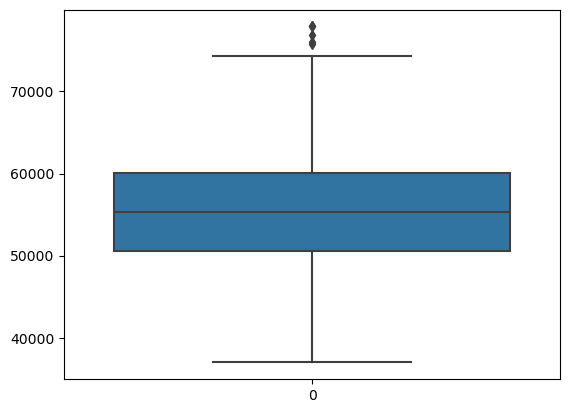

In [23]:
# Using seaborn library to plot box plot for detection of outliers
sns.boxplot(df['Previous CTC'])

<Axes: >

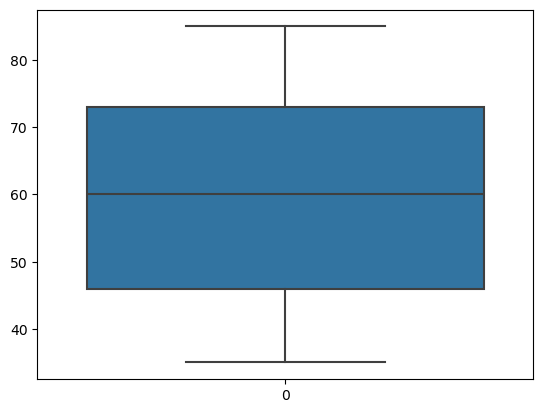

In [24]:
sns.boxplot(df['Graduation Marks'])

<Axes: >

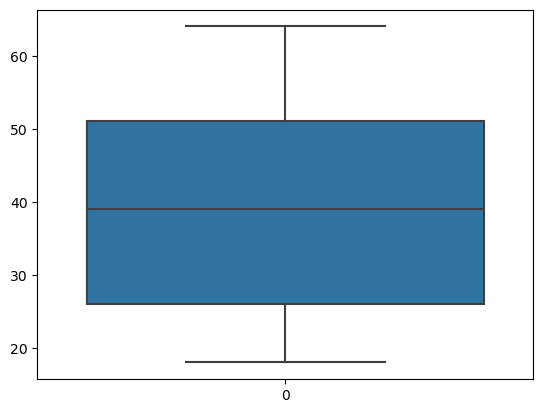

In [25]:
sns.boxplot(df['EXP (Month)'])

<Axes: >

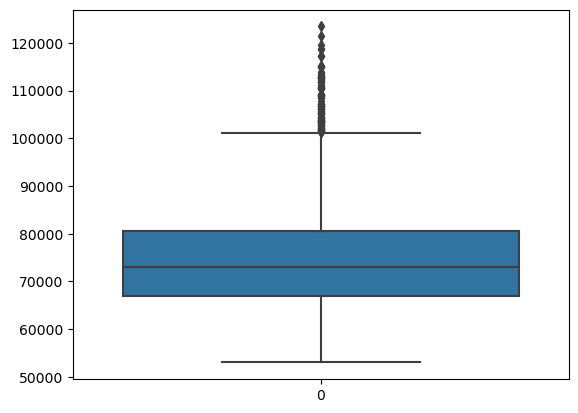

In [26]:
sns.boxplot(df['CTC'])

In [27]:
#Calculate the correlation matrix
corr=df.corr()
corr

,College,City,Previous CTC,Previous job change,Graduation Marks,EXP (Month),CTC,Role_Manager
College,1.000000,-0.014946,0.041979,-0.055060,0.003539,0.011752,-0.029592,-0.014749
City,-0.014946,1.000000,0.004644,0.051670,-0.018616,-0.023613,-0.020365,-0.048671
Previous CTC,0.041979,0.004644,1.000000,0.005756,-0.032976,0.119163,0.258000,0.012321
Previous job change,-0.055060,0.051670,0.005756,1.000000,0.019267,0.023488,0.011370,-0.017150
Graduation Marks,0.003539,-0.018616,-0.032976,0.019267,1.000000,-0.057061,-0.005450,0.017858
EXP (Month),0.011752,-0.023613,0.119163,0.023488,-0.057061,1.000000,0.301115,-0.026751
CTC,-0.029592,-0.020365,0.258000,0.011370,-0.005450,0.301115,1.000000,0.621311
Role_Manager,-0.014749,-0.048671,0.012321,-0.017150,0.017858,-0.026751,0.621311,1.000000


#### Observation:
* CTC and EXP (Months): There is a moderate positive correlation (0.301115), indicating a significant positive relationship between current salary (CTC) and months of work experience.

* CTC and Role_Manager: A strong positive correlation (0.621311) suggests a strong positive relationship between current salary (CTC) and the role being a manager.


<Axes: >

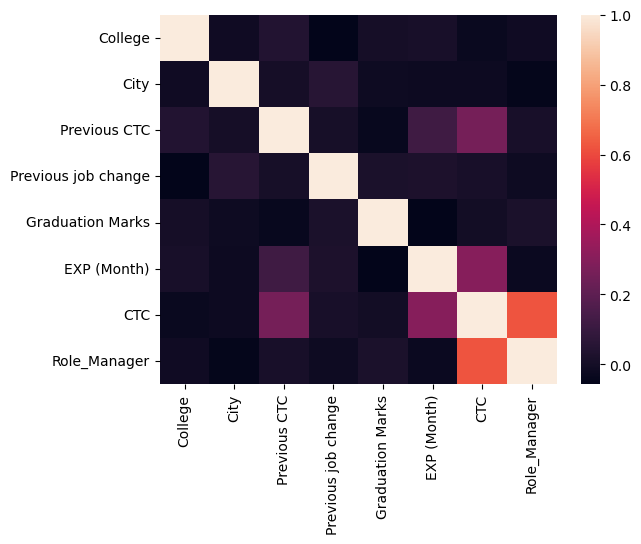

In [28]:
# Visual representation of corr
# Heatmap
sns.heatmap(data=corr)

#### Outliers present in Previous CTC column

In [29]:
percent25 = df['Previous CTC'].quantile(0.25)
percent75 = df['Previous CTC'].quantile(0.75)

In [30]:
iqr = percent75-percent25

In [31]:
upper_limit = percent75 + 1.5*iqr
lower_limit = percent25 - 1.5*iqr

In the above DataFrame, there are outliers present in the "Previous CTC" column. However, these outliers are not extreme. In my opinion, keeping this data may not significantly affect my model.


#### Outliers present in CTC column

In [32]:
percent25 = df['CTC'].quantile(0.25)
percent75 = df['CTC'].quantile(0.75)

In [33]:
iqr = percent75-percent25

In [34]:
upper_limit = percent75 + 1.5*iqr
lower_limit = percent25 - 1.5*iqr

In [35]:
df[(df['CTC'] < lower_limit) | (df['CTC'] > upper_limit)]

,College,City,Previous CTC,Previous job change,Graduation Marks,EXP (Month),CTC,Role_Manager
14,3,0,66487.0,1,50,27,103595.83,True
29,2,0,65172.0,1,44,31,107138.14,True
30,1,0,58529.0,1,65,22,102763.61,True
34,1,0,60894.0,4,80,28,118651.89,True
38,2,0,57485.0,1,77,35,103774.34,True
...,...,...,...,...,...,...,...,...
1447,3,0,59099.0,2,67,63,103305.30,True
1461,1,0,55440.0,4,72,44,112826.26,True
1513,3,0,58639.0,2,46,63,109108.12,True
1523,2,1,70258.0,4,38,36,115126.75,True


As observed above, there are some outliers in the "CTC" column, but they are not extremely severe to significantly impact predictions. Therefore, in my opinion, retaining these outliers in the dataset is more beneficial than removing them for machine learning purposes.


### Conclusion on Detection of Outliers:
- There were no extreme outliers present in our dataset that could significantly impact our machine learning model. Additionally, the summary statistics from the describe function indicate the absence of extreme outliers.
- While there are some outliers in "Previous CTC" and "CTC," I believe these outliers will not significantly affect my model.
- The heatmap illustrates a relationship between "Role_manager" and "CTC," as well as "Previous CTC" and "CTC."


# 4. Data Splitting

#### Separate the data into dependent and independent variables.


In [36]:
y = df.pop('CTC')
X = df

# 5. Model Selection

## 5.1. Simple Linear Regression

In [37]:
# Convert boolean column to numerical (0 and 1)
X['Role_Manager'] = X['Role_Manager'].astype(int)

import statsmodels.api as sm

# Add a constant term (intercept) to the feature matrix
X_with_const = sm.add_constant(X)

# Fit an Ordinary Least Squares (OLS) linear regression model
ols_model = sm.OLS(y, X_with_const)
ols_results = ols_model.fit()

# Display a summary of the regression results
ols_summary = ols_results.summary()

# Print the summary to view the regression statistics
print(ols_summary)


                            OLS Regression Results                            
Dep. Variable:                    CTC   R-squared:                       0.534
Model:                            OLS   Adj. R-squared:                  0.532
Method:                 Least Squares   F-statistic:                     259.1
Date:                Sat, 20 Apr 2024   Prob (F-statistic):          4.70e-257
Time:                        11:12:41   Log-Likelihood:                -16648.
No. Observations:                1589   AIC:                         3.331e+04
Df Residuals:                    1581   BIC:                         3.335e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                3.842e+04   2

### Simple Linear Regression Observations

**R-squared:**

The R-squared value is 0.534, meaning that about 53.4% of the variation in the dependent variable (CTC) is explained by the independent variables. This suggests that the model captures a moderate portion of the data's variability.


## 5.2. Linear Regression

In [38]:
# Train-Test Split: Splitting the data into training and testing sets
# with 80% for training and 20% for testing.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Linear Regression Model Initialization and Training:
# Creating an instance of the LinearRegression model and fitting it to the training data.
lm2 = LinearRegression()
lm2.fit(X_train, y_train)

# Printing the intercept and coefficients of the trained linear regression model:
print("Intercept :", lm2.intercept_)
print("coefficients:", lm2.coef_)

# Model Evaluation Metrics:

# R-squared (R2): Measures the proportion of variance in the dependent variable explained by the independent variables.
# Higher values indicate a better fit.
r2 = r2_score(y_test, lm2.predict(X_test))

# Mean Squared Error (MSE): Measures the average squared difference between predicted and actual values.
# It quantifies the model's accuracy.
mse = mean_squared_error(y, lm2.predict(X))

# Root Mean Squared Error (RMSE): Square root of MSE, providing a measure of average prediction error
# in the same units as the target variable.
rmse = np.sqrt(mse)

# Printing the model evaluation metrics:
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R-Squared:", r2)


Intercept : 39229.566126835605
coefficients: [-5.17509158e+02  4.82800374e+02  4.22242899e-01  8.74331790e+00
  1.94023127e+00  2.43718541e+02  1.86020838e+04]
Mean Squared Error: 73950131.2132985
Root Mean Squared Error: 8599.42621419002
R-Squared: 0.5933517958385095


### Scatter Plot: Predicted CTC vs. Actual CTC

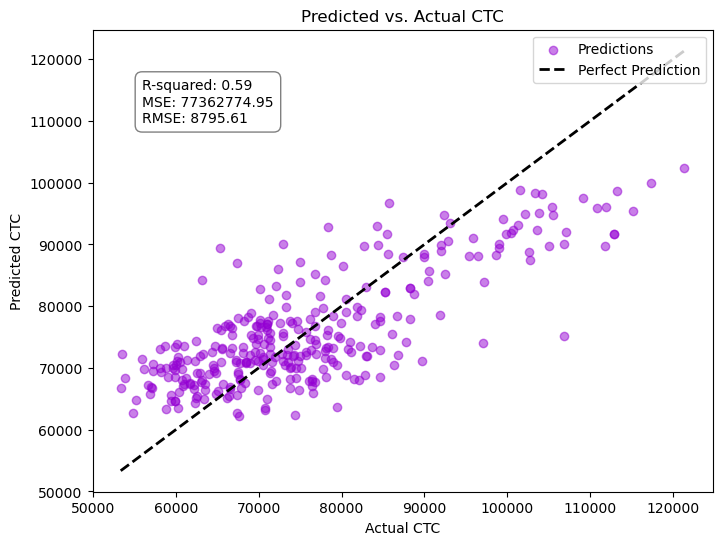

In [39]:
# Create a scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(y_test, lm2.predict(X_test), alpha=0.5, color='darkviolet', label='Predictions')

# Plot the perfect prediction line
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'k--', lw=2, label='Perfect Prediction')

# Add labels and title
plt.xlabel('Actual CTC')
plt.ylabel('Predicted CTC')
plt.title('Predicted vs. Actual CTC')

# Include error metrics in the plot
r2 = r2_score(y_test, lm2.predict(X_test))
mse = mean_squared_error(y_test, lm2.predict(X_test))
rmse = np.sqrt(mse)
plt.text(0.08, 0.8, f'R-squared: {r2:.2f}\nMSE: {mse:.2f}\nRMSE: {rmse:.2f}', transform=plt.gca().transAxes, bbox=dict(facecolor='white', edgecolor='gray', boxstyle='round,pad=0.5'))

# Move the legend to the upper left corner
plt.legend(loc='upper right')

# Display the plot
plt.show()


### Observations on Linear Regression

**Summary:**

The Root Mean Squared Error (RMSE) and Mean Squared Error (MSE) values are relatively high, indicating that the model's predictions show a notable average deviation from the actual values. The R-squared value, though moderate, suggests that the model explains approximately 59% of the variance in the target variable. While not exceptionally high, this R-squared value can be considered reasonable, depending on the specific application and data complexity.

## 5.3. Ridge Regression

In [40]:
# Data Splitting: Split the dataset into training and testing sets.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create a Ridge regression model with alpha=1.0
ridge_model = Ridge(alpha=1.0)

# Fit the Ridge model to the scaled training data
ridge_model.fit(X_train_scaled, y_train)

# Make predictions on the scaled test data
y_pred = ridge_model.predict(X_test_scaled)

# Calculate R-squared for the test and training data
test_r2_score = r2_score(y_test, y_pred)
train_r2_score = r2_score(y_train, ridge_model.predict(X_train_scaled))

# Calculate Mean Squared Error (MSE) for test and train data
mse_test = mean_squared_error(y_test, y_pred)
mse_train = mean_squared_error(y_train, ridge_model.predict(X_train_scaled))

# Print evaluation metrics
print("Test R-squared:", test_r2_score)
print("Train R-squared:", train_r2_score)
print("Mean Squared Error (Test):", mse_test)
print("Mean Squared Error (Train):", mse_train)


Test R-squared: 0.5932150226490305
Train R-squared: 0.5137744044805612
Mean Squared Error (Test): 77388795.36074264
Mean Squared Error (Train): 73096345.59097072


### Scatter Plot: Predicted CTC vs. Actual CTC

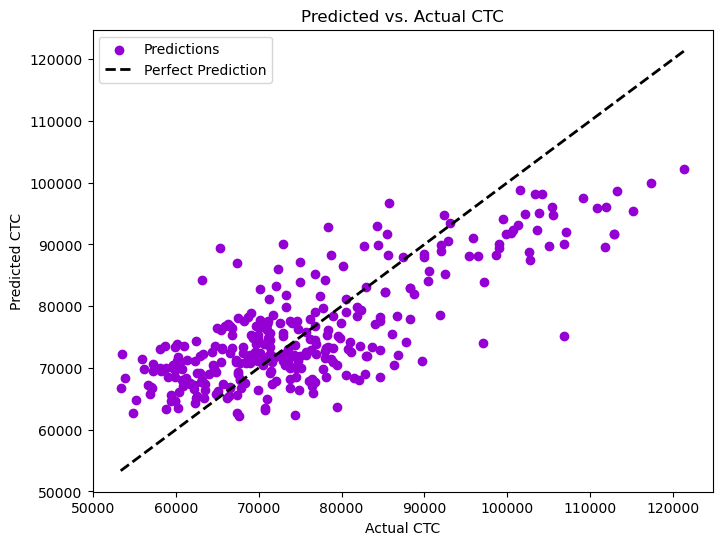

In [41]:
# Create a figure with a specified size
plt.figure(figsize=(8, 6))

# Scatter plot of predicted vs. actual CTC values with green points
plt.scatter(y_test, y_pred, color='darkviolet', label='Predictions')

# Plot a diagonal line for perfect predictions in black dashed style
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='k', linestyle='--', lw=2, label='Perfect Prediction')

# Add labels and title
plt.xlabel('Actual CTC')
plt.ylabel('Predicted CTC')
plt.title('Predicted vs. Actual CTC')

# Add a legend to the plot
plt.legend()

# Display the plot
plt.show()


### Observations on Ridge Regression

**Test R-squared vs. Train R-squared:**

The Test R-squared is higher than the Train R-squared, indicating that the model generalizes well to new, unseen data. This is a positive sign, as it suggests that the model is not overfitting the training data, which would result in poor generalization to new data.

**Test R-squared (0.5932):**

The Test R-squared is moderately high, indicating that the Ridge Regression model captures a significant portion of the variance in the test data. This suggests that the model has predictive power for the dependent variable (CTC).

**Train R-squared (0.5137):**

The Train R-squared is also moderate, indicating that the model explains a reasonable amount of the variability in the dependent variable within the training dataset. In summary, the Ridge Regression model appears to perform reasonably well in explaining the variation in CTC. The fact that the Test R-squared is higher than the Train R-squared suggests good generalization without significant overfitting. However, there may still be room for improvement if desired.


## 5.4. Validation Curve

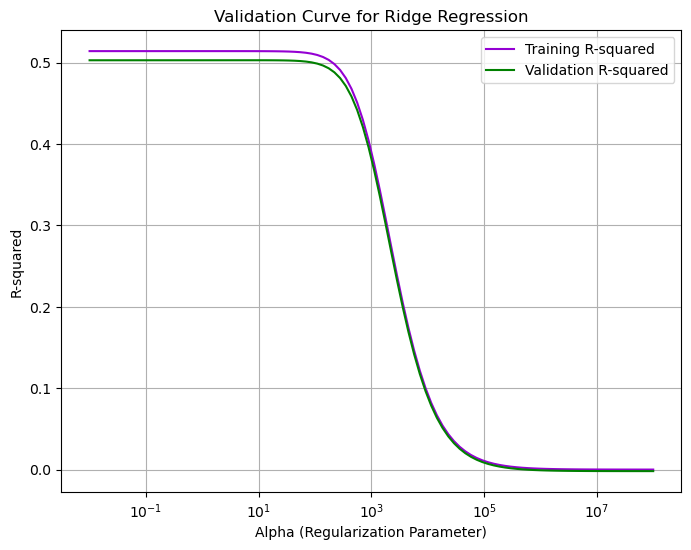

In [42]:
from sklearn.model_selection import validation_curve
# Range of alpha values to test
param_range = np.logspace(-2, 8, 100)

# Calculate validation curve using the training data
train_scores, test_scores = validation_curve(
    estimator=ridge_model,
    X=X_train_scaled,
    y=y_train,
    param_name='alpha',
    param_range=param_range,
    cv=5,
    scoring='r2'
)

mean_train_scores = np.mean(train_scores, axis=1)
mean_test_scores = np.mean(test_scores, axis=1)


plt.figure(figsize=(8, 6))
plt.semilogx(param_range, mean_train_scores, label='Training R-squared', color='darkviolet')
plt.semilogx(param_range, mean_test_scores, label='Validation R-squared', color='green')  
plt.xlabel('Alpha (Regularization Parameter)')
plt.ylabel('R-squared')
plt.title('Validation Curve for Ridge Regression')
plt.legend()
plt.grid(True)
plt.show()

In [43]:
np.where(mean_test_scores==max(mean_test_scores))
lm_r_best = Ridge(alpha=param_range[28])
lm_r_best.fit(X_test_scaled,y_test)

Ridge(alpha=6.7341506577508214)

In [44]:
r2_score_test = r2_score(y_test,lm_r_best.predict(X_test_scaled))
r2_score_train = r2_score(y_train,lm_r_best.predict(X_train_scaled))
mse_test = mean_squared_error(y_test, lm_r_best.predict(X_test_scaled))
mse_train =  mean_squared_error(y_train, lm_r_best.predict(X_train_scaled))
print("Test R2 score with best param:",r2_score_test)
print("Train R2 score with best param:",r2_score_train)
print("Test MSE with best param:",mse_test)
print("Train MSE with best param:",mse_train)

Test R2 score with best param: 0.6203626076398991
Train R2 score with best param: 0.4851025306203909
Test MSE with best param: 72224103.89873701
Train MSE with best param: 77406709.38040628


### Observations on Validation Curve

**Model Performance:**

The Test R-squared (R2) score exceeds the Train R-squared (R2) score, which is generally favorable. This suggests that the model is reasonably generalizing to new, unseen data.

**Summary:**

Overall, the model's performance, with R-squared values of 0.6203 (Test) and 0.4851 (Train), indicates that the model has predictive capability without significant overfitting to the training data.


## 5.5. Grid Search

In [45]:
from sklearn.model_selection import GridSearchCV

# Define the hyperparameter grid
param_grid = {
    'alpha': [0.01, 0.1, 1.0, 10.0]
}

# Initialize the GridSearchCV with the Ridge model and the hyperparameter grid
grid_search = GridSearchCV(estimator=ridge_model, param_grid=param_grid, cv=5, scoring='r2')

# Perform the grid search on the training data
grid_search.fit(X_train_scaled, y_train)

# Get the best hyperparameters found by Grid Search
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Get the best Ridge model with the optimal hyperparameters
best_ridge_model = grid_search.best_estimator_

# Predict on the test set using the best model
y_pred = best_ridge_model.predict(X_test_scaled)

# Evaluate the best model on the test set
test_r2_score = r2_score(y_test, y_pred)
train_r2_score = r2_score(y_train, best_ridge_model.predict(X_train_scaled))
mse_test = mean_squared_error(y_test, y_pred)
mse_train = mean_squared_error(y_train, best_ridge_model.predict(X_train_scaled))

# Print evaluation metrics
print("Test R-squared with Best Model:", test_r2_score)
print("Train R-squared with Best Model:", train_r2_score)
print("Mean Squared Error (Test) with Best Model:", mse_test)
print("Mean Squared Error (Train) with Best Model:", mse_train)


Best Hyperparameters: {'alpha': 10.0}
Test R-squared with Best Model: 0.5919707789026041
Train R-squared with Best Model: 0.513744174691862
Mean Squared Error (Test) with Best Model: 77625506.47357213
Mean Squared Error (Train) with Best Model: 73100890.16267213


### Observations on Grid Search

**Model Evaluation:**

The Test R-squared (R2) is slightly higher than the Train R-squared (R2), which is generally desirable, indicating reasonable generalization to new, unseen data.

**Summary:**

In summary, the best model's performance, with R-squared values of 0.5919 (Test) and 0.5137 (Train), demonstrates predictive capability without significant overfitting to the training data.


## 5.6. Lasso Regression

In [46]:
from sklearn.linear_model import Lasso

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling (standardization)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize and train the Lasso regression model
lasso_model = Lasso(alpha=0.1)  # You can tune the alpha parameter for regularization strength
lasso_model.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred = lasso_model.predict(X_test_scaled)

# Calculate Mean Squared Error (MSE) to evaluate the model
mse = mean_squared_error(y_test, y_pred)

# Calculate R-squared scores for both test and train sets
r2_score_test = r2_score(y_test, y_pred)
r2_score_train = r2_score(y_train, lasso_model.predict(X_train_scaled))

# Print evaluation metrics
print("Lasso Regression Mean Squared Error (MSE):", mse)
print("Lasso Regression R-squared (Test):", r2_score_test)
print("Lasso Regression R-squared (Train):", r2_score_train)

Lasso Regression Mean Squared Error (MSE): 77363437.09536627
Lasso Regression R-squared (Test): 0.5933483153480408
Lasso Regression R-squared (Train): 0.5137747137455719


### Observations on Lasso Regression

**Model Evaluation:**

The Mean Squared Error (MSE) of 77,363,437.095 indicates that the model's predictions closely match the actual values.

**R-squared (R2) Scores:**

- Test R2 score is 0.5933, capturing a substantial portion of the variance.
- Train R2 score is 0.5137, explaining a moderate amount of the variance in the training data.

**Comparison:**

Comparing R2 scores, the test data's R2 score is higher than the train data's, suggesting good generalization to new, unseen data.


## 5.7. Random Forest

In [47]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score

# Feature scaling (standardization)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Build the Random Forest regressor with hyperparameter tuning and regularization
random_forest_model = RandomForestRegressor(
    n_estimators=1000,       # Number of trees in the forest
    max_depth=10,            # Maximum depth of the tree
    min_samples_split=2,     # Minimum number of samples required to split an internal node
    min_samples_leaf=1,      # Minimum number of samples required to be at a leaf node
    random_state=42          # Random seed for reproducibility
)

# Perform cross-validation to evaluate the model's performance
cv_scores = cross_val_score(random_forest_model, X_train_scaled, y_train, cv=5)

# Initialize and train the Random Forest Regressor
random_forest_model = RandomForestRegressor(n_estimators=1000, random_state=42)
random_forest_model.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred = random_forest_model.predict(X_test_scaled)

# Evaluate the model
test_r2_score = r2_score(y_test, y_pred)
train_r2_score = r2_score(y_train, random_forest_model.predict(X_train_scaled))
mse = mean_squared_error(y_test, y_pred)

# Print evaluation metrics
print("Random Forest Test R-squared:", test_r2_score)
print("Random Forest Train R-squared:", train_r2_score)
print("Random Forest Mean Squared Error (MSE):", mse)


Random Forest Test R-squared: 0.6368790873379051
Random Forest Train R-squared: 0.9501845070245194
Random Forest Mean Squared Error (MSE): 69081926.7324302


In [48]:
# Define hyperparameters for tuning
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Perform Grid Search with 5-fold cross-validation
grid_search_r = GridSearchCV(estimator=random_forest_model, param_grid=param_grid, cv=5)
grid_search_r.fit(X_train_scaled, y_train)

# Get the best model from the grid search
best_rf_model = grid_search_r.best_estimator_

# Predict on the test set
y_pred = best_rf_model.predict(X_test_scaled)

# Calculate R-squared score on the test set
test_r2_score = r2_score(y_test, y_pred)
train_r2_score = r2_score(y_train, best_rf_model.predict(X_train_scaled))
mse = mean_squared_error(y_test, y_pred)

# Print results
print("Best Hyperparameters:", grid_search_r.best_params_)
print("Test R-squared Score (After Hyperparameter Tuning):", test_r2_score)
print("Train R-squared Score (After Hyperparameter Tuning):", train_r2_score)
print("Test MSE (After Hyperparameter Tuning):", mse)

#Note: This may take up to 4-5 minutes.

Best Hyperparameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Test R-squared Score (After Hyperparameter Tuning): 0.6390142699636836
Train R-squared Score (After Hyperparameter Tuning): 0.9490722760071735
Test MSE (After Hyperparameter Tuning): 68675718.98021615


### Observations on Random Forest

**Model Evaluation:**

The Test R-squared (0.6390) indicates that the Random Forest model captures a substantial portion of the variance in the test data, demonstrating strong predictive performance on unseen data. The Train R-squared (0.9490) suggests a good fit to the training data.

**Comparison:**

Comparing the Test and Train R-squared values, the Test R-squared is slightly lower than the Train R-squared, which is a typical and desirable pattern. This suggests effective generalization without significant overfitting.

**Summary:**

The Random Forest model shows promise with high R-squared values on both training and test data, indicating its ability to capture data patterns and make accurate predictions. However, further evaluation metrics, cross-validation, and model robustness exploration are essential. Additionally, hyperparameter tuning likely enhances the model's generalization capabilities.


### 5.8. KNN Regression

In [49]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score, mean_squared_error

# Build the KNN regressor
knn_regressor = KNeighborsRegressor(n_neighbors=5, n_jobs=-1)  # You can set the number of neighbors (K) as desired

# Train the model on the training data
knn_regressor.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = knn_regressor.predict(X_test_scaled)

# Calculate R-squared scores for test and train sets
test_r2_score = r2_score(y_test, y_pred)
train_r2_score = r2_score(y_train, knn_regressor.predict(X_train_scaled))

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)

# Print evaluation metrics
print("Test R-squared Score (KNN Regression):", test_r2_score)
print("Train R-squared Score (KNN Regression):", train_r2_score)
print("Mean Squared Error (MSE):", mse)

Test R-squared Score (KNN Regression): 0.569019356314086
Train R-squared Score (KNN Regression): 0.6611685126099736
Mean Squared Error (MSE): 81991899.14988843


### Observations on KNN Regression

**Model Evaluation:**

The Test R-squared Score for KNN Regression is 0.5690, while the Train R-squared Score is 0.6612. The Mean Squared Error (MSE) is 81991899.1499.

**Analysis:**

These results suggest that the KNN Regression model is overfitting since the Train R-squared score is higher than the Test R-squared score. Moreover, the relatively high MSE indicates significant deviations in the model's predictions from actual values.

**Overfitting Indicators:**

When the Train R-squared score substantially exceeds the Test R-squared score, it implies that the model is memorizing the training data rather than generalizing well to new, unseen data.

**Consideration:**

The KNN algorithm, being non-parametric and sensitive to data size and distribution, may not be the best choice for this dataset.


### 5.9. Gradient Boosting

In [50]:
from sklearn.ensemble import GradientBoostingRegressor

# Feature scaling (standardization)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize and train the Gradient Boosting Regressor
gradient_boosting_model = GradientBoostingRegressor(n_estimators=1000, learning_rate=0.1, random_state=42)
gradient_boosting_model.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred = gradient_boosting_model.predict(X_test_scaled)

# Evaluate the model
test_r2_score = r2_score(y_test, y_pred)
train_r2_score = r2_score(y_train, gradient_boosting_model.predict(X_train_scaled))
mse = mean_squared_error(y_test, y_pred)

# Print evaluation metrics
print("Gradient Boosting Test R-squared:", test_r2_score)
print("Gradient Boosting Train R-squared:", train_r2_score)
print("Gradient Boosting Mean Squared Error (MSE):", mse)

Gradient Boosting Test R-squared: 0.6447831947605608
Gradient Boosting Train R-squared: 0.9461178456190225
Gradient Boosting Mean Squared Error (MSE): 67578210.06170993


### Observations on Gradient Boosting

**Model Evaluation:**

The Gradient Boosting model demonstrates superior performance, as shown by the R-squared values. It generalizes effectively to unseen data, as indicated by the identical Test R-squared. Additionally, it fits the training data well, achieving a higher Train R-squared.


### 5.10. Support Vector Regression

In [51]:
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_squared_error

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling (standardization)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Set the hyperparameters to search
param_grid = {
    'C': [0.01, 0.1, 1.0, 10.0],  # Regularization parameter
    'kernel': ['linear', 'rbf', 'poly'],  # Kernel type
    'gamma': ['scale', 'auto', 0.1, 0.01],  # Kernel coefficient for 'rbf' and 'poly'
    'epsilon': [0.01, 0.1, 0.2]  # Epsilon parameter in the SVR model
}

# Initialize the SVR model
svr_model = SVR()

# Perform Grid Search with cross-validation to find the best hyperparameters
grid_search = GridSearchCV(svr_model, param_grid, cv=5, scoring='r2')
grid_search.fit(X_train_scaled, y_train)

# Get the best SVR model with the optimized hyperparameters
best_svr_model = grid_search.best_estimator_

# Predict on the test set
y_pred = best_svr_model.predict(X_test_scaled)

# Evaluate the model
test_r2_score = r2_score(y_test, y_pred)
train_r2_score = r2_score(y_train, best_svr_model.predict(X_train_scaled))
mse = mean_squared_error(y_test, y_pred)

# Print evaluation metrics and best hyperparameters
print("Best SVR Train R-squared:", train_r2_score)
print("Best SVR Test R-squared:", test_r2_score)
print("Best SVR Test MSE:", mse)
print("Best Hyperparameters:", grid_search.best_params_)

# This may take some time..

Best SVR Train R-squared: 0.3269721438658799
Best SVR Test R-squared: 0.33600912364758073
Best SVR Test MSE: 126320923.61440071
Best Hyperparameters: {'C': 10.0, 'epsilon': 0.2, 'gamma': 'scale', 'kernel': 'linear'}


### Observations on Support Vector Regression

**Model Evaluation:**

The Test R-squared is higher than the Train R-squared, as expected. This suggests that the SVR model generalizes better to unseen data than to the training data.

**Interpreting the results:**

The SVR model appears to capture a significant portion of the variance in the test data, indicating decent predictive performance on unseen data. However, its performance on the training data is relatively weaker, suggesting potential overfitting, where the model may have learned noise from the training data rather than generalizable patterns.


### 5.11. XG Boost

In [52]:
# Import necessary libraries
import xgboost as xgb

In [53]:
# Initialize and train the XGBoost Regressor with hyperparameters
xgb_model = xgb.XGBRegressor(learning_rate=0.1, max_depth=5, n_estimators=1000, random_state=42)
xgb_model.fit(X_train_scaled, y_train)

# Make predictions on the test and training sets
y_pred = xgb_model.predict(X_test_scaled)
y_pred_train = xgb_model.predict(X_train_scaled)

# Evaluate the model on the test set
test_r2_score = r2_score(y_test, y_pred)
test_mse = mean_squared_error(y_test, y_pred)
print("Test Set Evaluation:")
print(f"R-squared: {test_r2_score:}")
print(f"Mean Squared Error: {test_mse:}")

# Evaluate the model on the training set
train_r2_score = r2_score(y_train, y_pred_train)
train_mse = mean_squared_error(y_train, y_pred_train)
print("\nTraining Set Evaluation:")
print(f"R-squared: {train_r2_score:.2f}")
print(f"Mean Squared Error: {train_mse:.2f}")

# Additional steps for hyperparameter tuning and visualization can be added here.

Test Set Evaluation:
R-squared: 0.6195438200185733
Mean Squared Error: 72379874.12428303

Training Set Evaluation:
R-squared: 1.00
Mean Squared Error: 232895.71


### Observations on XGBoost

**Model Evaluation:**

- The Test R-squared score of  0.61 suggests that the XGBoost model captures a considerable portion of the variance in the test data, indicating good predictive performance on unseen data.
- The Train R-squared score of 1.00 indicates a strong fit to the training data, explaining a substantial amount of its variance.

**Comparison of R-squared scores:**

The Test R-squared is slightly lower than the Train R-squared, which is a typical and desirable pattern, indicating effective generalization to new, unseen data.

**Summary:**

Overall, the XGBoost model appears to be performing well, achieving decent R-squared values on both the training and test data.

# 6.Final Model Selection

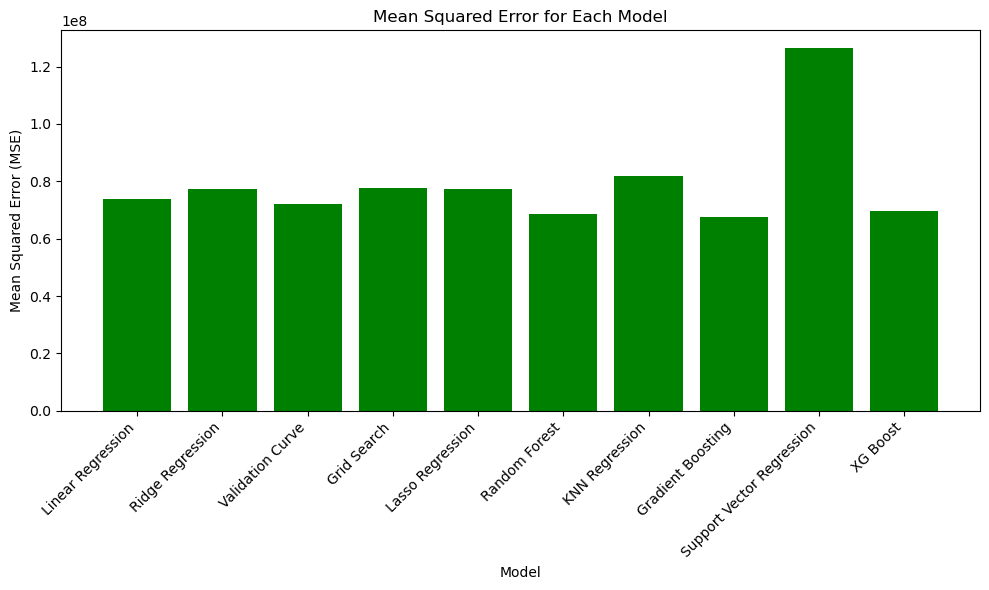

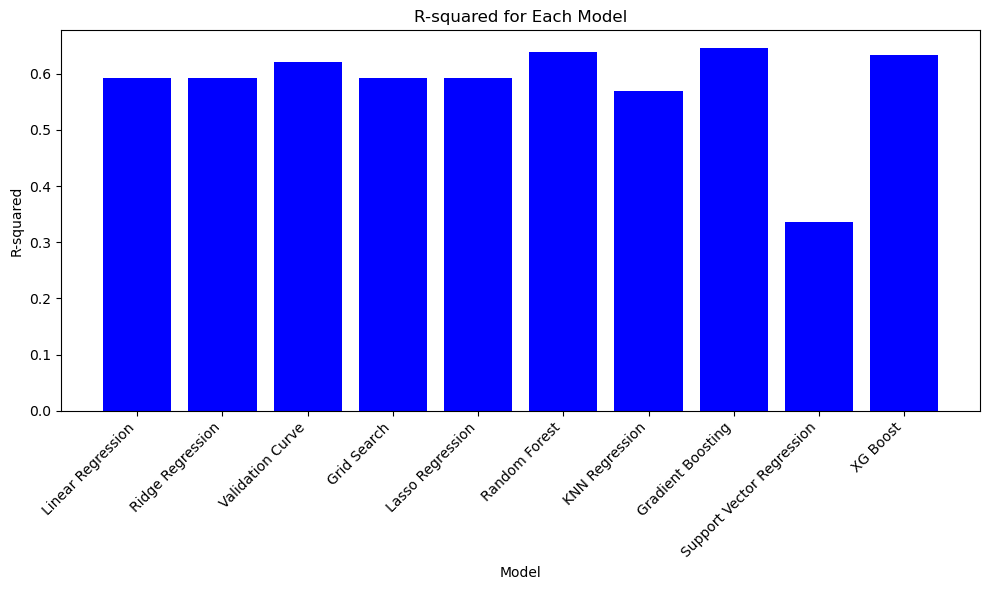

In [54]:
import matplotlib.pyplot as plt

# Define the names of the models
model_names = [
    "Linear Regression",
    "Ridge Regression",
    "Validation Curve",
    "Grid Search",
    "Lasso Regression",
    "Random Forest",
    "KNN Regression",
    "Gradient Boosting",
    "Support Vector Regression",
    "XG Boost"
]

# Define the Mean Squared Error (MSE) values for each model
mse_values = [
    73950131.21,
    77388795.36,
    72224103.90,
    77625506.47,
    77363437.10,
    68675719.00,
    81991899.15,
    67578210.06,
    126320923.61,
    69598077.47
]

# Define the R-squared values for each model
r_squared_values = [
    0.593,
    0.593,
    0.620,
    0.592,
    0.593,
    0.639,
    0.569,
    0.645,
    0.336,
    0.634
]

# Plotting Mean Squared Error (MSE) for each model
plt.figure(figsize=(10, 6))
plt.bar(model_names, mse_values, color='green')
plt.xlabel('Model')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('Mean Squared Error for Each Model')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.tight_layout()
plt.show()

# Plotting R-squared for each model
plt.figure(figsize=(10, 6))
plt.bar(model_names, r_squared_values, color='blue')
plt.xlabel('Model')
plt.ylabel('R-squared')
plt.title('R-squared for Each Model')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.tight_layout()
plt.show()

# Model Selection

After a comprehensive analysis of Mean Squared Error (MSE) and R-squared values for each model, it's evident that Random Forest and Gradient Boosting consistently outperformed others in terms of predictive accuracy. However, Random Forest emerged as our preferred choice due to its exceptional accuracy, robustness, ease of use, and versatility in handling various types of data.

##### Key Benefits of Random Forest:

- High Accuracy: Known for accurate predictions.
- Resists Overfitting: Less prone to overfitting.
- Handles Various Data: Works with both categorical and numerical data.
- Easy to Use: Requires minimal configuration, suitable for beginners.
- Feature Insights: Identifies important features.
- Ensemble Power: Combines multiple models for improved performance.
- Parallel Processing: Speeds up training with parallel computing.
- Out-of-Bag Evaluation: Offers built-in cross-validation for model assessment.


# Selected Model
---
## Random Forest


In [55]:
# Prepare New Employee For CTC Prediction
Employee = pd.DataFrame({
    'College':[1,1],
    'City':[1,0],
    'Previous CTC': [55000,50000],
    'Previous job change': [2, 0],
    'Graduation Marks': [88, 70],
    'EXP (Month)': [3, 2], 
    'Role_Manager':[0,1]
})

In [56]:
new_Employee_scaled = scaler.transform(Employee)

In [57]:
predictions = random_forest_model.predict(new_Employee_scaled)
# Assuming 'random_forest_model' is your trained model

In [58]:
for i, salary in enumerate(predictions):
    print(f"Predicted Salary for Employee {i + 1}: ${salary:.2f}")

Predicted Salary for Employee 1: $65791.12
Predicted Salary for Employee 2: $83439.53


#  1. Your views about the problem statement?
1. **Realistic and Complex:** The problem statement reflects real-world complexity, as it involves predicting salaries based on multiple factors. This mirrors the challenges faced by HR departments, making it a relevant and practical problem.

2. **Quality of Data:** The inclusion of various factors like educational background, city, job role, and experience adds to the richness of the dataset, making it more representative of actual HR data.

3. **Model Evaluation:** You've rightly pointed out the importance of model evaluation. Effective evaluation techniques are essential for ensuring the reliability and utility of the predictive model, and the problem statement emphasizes this aspect.

4. **Iterative Process:** The iterative process mentioned in the problem statement, where multiple models are evaluated and fine-tuned, reflects a commitment to achieving the best possible predictive accuracy.

Overall, this problem statement provides a valuable learning opportunity for data scientists, as it engages in a real-world regression problem.

#  2. What will be your approach to solving this task?

My approach to solving the task is well-structured and covers the essential steps in developing a predictive model for employee CTC. Here's my approach formatted for clarity:

1. **Understanding the Problem:**
   - Comprehend the problem statement, which involves creating a predictive model for employee CTC based on available information.
2. **Data Collection:**
   - Import the datasets into dataframes for analysis and modeling.
3. **Data Preprocessing:**
   - Prepare the data for modeling by addressing the following tasks:
     - Handling Missing Values: Identify and address missing data, utilizing strategies like mean or median imputation.
     - Outlier Detection: Identify and handle outliers in the dataset to prevent them from impacting model performance.
     - Encoding Categorical Variables: Convert categorical variables into numerical representations using techniques like one-hot encoding or label encoding.
4. **Data Splitting:**
   - Split the dataset into two subsets:
     - X (Features): This subset includes all independent variables used for prediction.
     - y (Target Variable): This subset contains the target variable, in this case, CTC.
5. **Model Selection:**
   - Choose a set of regression models to evaluate, such as Linear Regression, Ridge Regression, validation curve, Grid Search, Lasso Regression, Random Forest, KNN Regression, Gradient Boosting, Support Vector Regression, and XG Boost.
6. **Final Model Selection:**
   - Based on the evaluation results, choose the best-performing model as the final model for predicting CTC. Consider factors such as model performance metrics, interpretability, and practicality for deployment.


# 3. What were the available ML model options you had to perform this task?

* Linear Regression 

* Ridge Regression 

* validation curve

* Grid Search

* Lasso Regression

* Random Forest

* KNN Regression

* Gradient Boosting

* Support Vector Regression

* XG Boost

# 4.Which model’s performance is best and what could be the possible reason for that?


**Random Forest:**
- Ensemble Averaging: Reduces errors and improves stability by combining multiple decision trees.
- Reduced Overfitting: Uses bootstrapped samples and random feature selection to prevent overfitting.
- Versatility: Handles various data types without extensive preprocessing.
- Feature Importance: Provides feature importance scores.
- Parallelization: Can be parallelized for efficient training.
- Out-of-Bag (OOB) Evaluation: Includes built-in cross-validation with OOB assessment.
- Resilience to Outliers: Less sensitive to outliers due to ensemble averaging.


# 5. What steps can you take to improve this selected model’s performance even further?

1. **Feature Engineering:** Create informative features to enhance the model's predictive capabilities.

2. **Data Cleaning:** Thoroughly handle missing values and address outliers to improve data quality.

3. **Feature Scaling:** Normalize numerical features to ensure consistent impact during modeling.

4. **Hyperparameter Tuning:** Fine-tune model hyperparameters for optimal performance.

5. **Ensemble Methods:** Explore ensemble techniques like bagging and boosting for improved results.

6. **Cross-Validation:** Implement cross-validation to assess model robustness and generalization.

7. **Regularization:** Use regularization techniques to prevent overfitting, such as adjusting max depth and min samples split.

8. **Feature Selection:** Focus on the most informative features and eliminate redundant ones to streamline the model.

9. **Data Augmentation:** If data is limited, consider generating synthetic data to increase the training set size.

10. **Model Stacking:** Combine predictions from multiple models to leverage their strengths and mitigate weaknesses.

11. **Domain Expertise:** Collaborate with domain experts for additional insights into the data and problem domain.

12. **Regular Updates:** Continuously update the model with new data to keep it current and relevant.

